In [2]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from library import regulations
from library import analysis
from library import tables


In [5]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.year == 2015]
data = data[data.eligible == True]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,9,10,280) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
reg_stars = {}
for reg in regulations.mainless:
    reg_stars[reg] = reg
    
df = analysis.create_count_proportion_df(data, list_of_regs = regulations.mainless, 
                                                dict_of_reg_labels = reg_stars)
df['stars'] = np.where(df['F-test p-value'] > .05, '', 
                  np.where((df['F-test p-value'] <= .05) & (df['F-test p-value'] > .01), '*', 
                      np.where((df['F-test p-value'] <= .01) & (df['F-test p-value'] > .001), '**', 
                          np.where((df['F-test p-value'] <= .001), '***',''))))
for reg in df.Regulation:
    reg_stars[reg] = df[df.Regulation == reg]['stars'].values[0]
reg_stars

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


{'reg25_0811': '',
 'reg25_081': '***',
 'reg25_0812': '***',
 'reg25_082': '***',
 'reg25_112': '***',
 'reg25_111': '***',
 'reg21_003': '***',
 'reg21_102': '***',
 'reg21_401': '***',
 'reg21_352': '***',
 'reg21_354': '***',
 'reg25_092': '***',
 'reg37_0012': '***',
 'reg25_036': '***'}

In [7]:
p_exempt = data.groupby(['geography'])[regulations.mainless].mean()
p_exempt = p_exempt.reset_index()
order = {'Urban' : 3,
         'Suburban': 2,
         'Town': 1,
         'Rural': 0}
p_exempt['order'] = p_exempt['geography'].map(order)
p_exempt = p_exempt.sort_values(by= ['order'])
p_exempt = p_exempt.set_index('order')
p_exempt

,geography,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_111,reg21_003,reg21_102,reg21_401,reg21_352,reg21_354,reg25_092,reg37_0012,reg25_036
order,,,,,,,,,,,,,,,
0,Rural,0.968545,0.460026,0.330275,0.251638,0.467890,0.161206,0.906946,0.605505,0.547837,0.170380,0.049803,0.184797,0.152031,0.297510
1,Town,0.974528,0.335849,0.224528,0.245283,0.464151,0.148113,0.855660,0.551887,0.257547,0.201887,0.028302,0.264151,0.283019,0.201887
2,Suburban,0.964677,0.507241,0.253267,0.296362,0.432003,0.144119,0.821265,0.317202,0.070293,0.247969,0.033204,0.429177,0.319675,0.032144
3,Urban,0.968490,0.338882,0.219382,0.245541,0.281213,0.086801,0.684899,0.077289,0.008918,0.133769,0.105826,0.414388,0.241379,0.020809


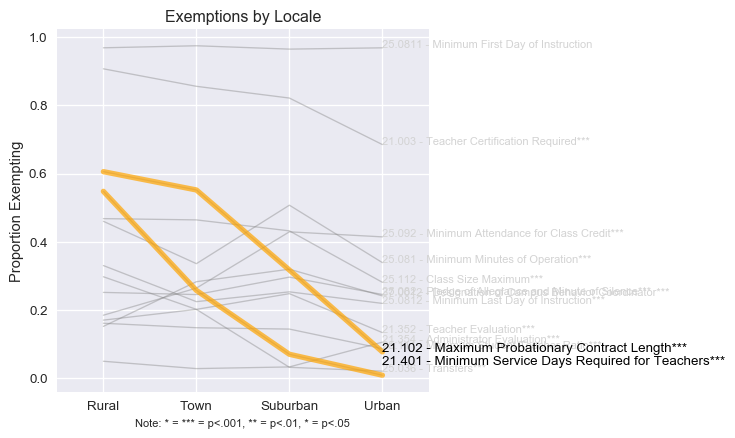

In [8]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['geography'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(-.5,3.5)

emphasize = ['reg21_102','reg21_401']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(3, p_exempt[reg][3] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    if reg == 'reg21_401':
        loc = p_exempt[reg][3] + .03
    else:
        loc = p_exempt[reg][3] 
    plt.plot(p_exempt['geography'], p_exempt[reg], marker='', color='orange', linewidth=4, alpha=0.7, label = 'label')
    plt.text(3, loc, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Locale')
plt.xlabel('Note: * = *** = p<.001, ** = p<.01, * = p<.05', size = 'small')

plt.savefig(table_path + 'spaghetti_geography_rural.png', bbox_inches="tight")



plt.show()

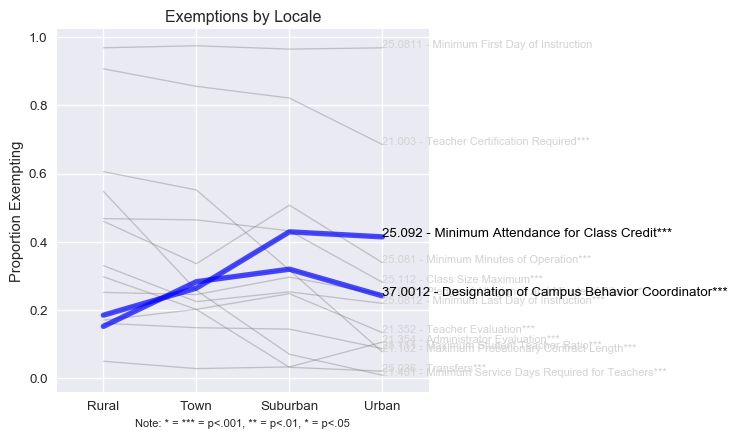

In [9]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['geography'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(-.5,3.5)

emphasize = ['reg37_0012', 'reg25_092']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(3, p_exempt[reg][3] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['geography'], p_exempt[reg], marker='', color='blue', linewidth=4, alpha=0.7, label = 'label')
    plt.text(3, p_exempt[reg][3], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.xlabel('Note: * = *** = p<.001, ** = p<.01, * = p<.05', size = 'small')
plt.title('Exemptions by Locale')

plt.savefig(table_path + 'spaghetti_geography_urban.png', bbox_inches="tight")

plt.show()